In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [4]:
ls 

 Volume in drive C is OS
 Volume Serial Number is 2C0D-B5CB

 Directory of C:\Users\tonym\documents\flatiron\phase_2\Project2\notebooks\Tony

10/04/2021  01:23 PM    <DIR>          .
10/04/2021  01:23 PM    <DIR>          ..
10/04/2021  01:21 PM    <DIR>          .ipynb_checkpoints
10/04/2021  10:24 AM             7,338 Tony.ipynb
10/04/2021  01:23 PM             8,749 Untitled.ipynb
               2 File(s)         16,087 bytes
               3 Dir(s)  749,569,134,592 bytes free


In [13]:
df = pd.read_csv(r'C:\Users\tonym\Documents\Flatiron\phase_2\Project2\Data\kc_house_data.csv')

In [27]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [68]:
df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287
21596,1523300157,10/15/2014,325000.0,2,0.75,1020,1076,2.0,NO,NONE,...,7 Average,1020,0.0,2008,0.0,98144,47.5941,-122.299,1020,1357


In [28]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.010799,0.021617,-0.012010,-0.008211,-0.001798,0.020672,-0.002701,-0.138557
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.605368,0.053953,0.129599,-0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,0.479386,0.155670,0.018495,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.686668,0.507173,0.051050,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.876448,0.318152,0.055660,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.184139,0.052946,0.004513,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.523989,0.489193,0.003535,-0.059541,0.049239,0.125943,0.280102,-0.010722
sqft_above,-0.010799,0.605368,0.479386,0.686668,0.876448,0.184139,0.523989,1.000000,0.424037,0.022137,-0.261570,-0.001199,0.344842,0.731767,0.195077
yr_built,0.021617,0.053953,0.155670,0.507173,0.318152,0.052946,0.489193,0.424037,1.000000,-0.225209,-0.347210,-0.148370,0.409993,0.326377,0.070777
yr_renovated,-0.012010,0.129599,0.018495,0.051050,0.055660,0.004513,0.003535,0.022137,-0.225209,1.000000,0.069846,0.032145,-0.072156,-0.000247,0.003852


In [ ]:
# sqft_living, sqftabove has a very high corrleation with price 

In [29]:
df.corr().abs()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.701917
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
bedrooms         0.308787
lat              0.306692
floors           0.256804
yr_renovated     0.129599
sqft_lot         0.089876
sqft_lot15       0.082845
yr_built         0.053953
zipcode          0.053402
long             0.022036
id               0.016772
Name: price, dtype: float64

In [44]:
df['view'].unique()

array(['NONE', nan, 'GOOD', 'EXCELLENT', 'AVERAGE', 'FAIR'], dtype=object)

In [45]:
df['view'].value_counts()

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

In [ ]:
# copy for cleaning 

In [46]:
df2 = df.copy()

In [121]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21534 non-null  int64  
 1   date           21534 non-null  object 
 2   price          21534 non-null  float64
 3   bedrooms       21534 non-null  int64  
 4   bathrooms      21534 non-null  float64
 5   sqft_living    21534 non-null  int64  
 6   sqft_lot       21534 non-null  int64  
 7   floors         21534 non-null  float64
 8   waterfront     19164 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21534 non-null  object 
 11  grade          21534 non-null  object 
 12  sqft_above     21534 non-null  int64  
 13  sqft_basement  21534 non-null  object 
 14  yr_built       21534 non-null  int64  
 15  yr_renovated   17704 non-null  float64
 16  zipcode        21534 non-null  int64  
 17  lat            21534 non-null  float64
 18  long  

In [47]:
df2 = df2[df2['view'].notna()]

In [48]:
df2['view'].unique()

array(['NONE', 'GOOD', 'EXCELLENT', 'AVERAGE', 'FAIR'], dtype=object)

In [51]:
df2 = df2[df2['price'].notna()]

(21534,)

price vs view 

<AxesSubplot:xlabel='view', ylabel='price'>

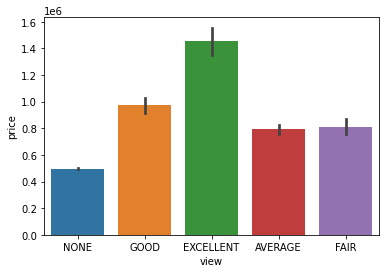

In [125]:
sns.barplot(x = df2['view'], y = df2['price'])


In [ ]:
# linear regssion price v sqft-living

In [67]:
df2['sqft_living'].shape

(21534,)

In [ ]:
# corr appears to be postive 

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

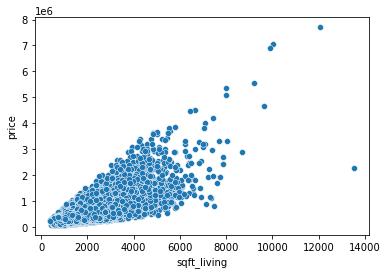

In [74]:
sns.scatterplot(x = df2['sqft_living'], y = df2['price'])

In [87]:
df2['sqft_lot'].sort

0         5650
1         7242
2        10000
3         5000
4         8080
         ...  
21592     1131
21593     5813
21594     1350
21595     2388
21596     1076
Name: sqft_lot, Length: 21534, dtype: int64

In [76]:
df2['sqft_lot']

0         5650
1         7242
2        10000
3         5000
4         8080
         ...  
21592     1131
21593     5813
21594     1350
21595     2388
21596     1076
Name: sqft_lot, Length: 21534, dtype: int64

In [123]:
print(df2['bedrooms'].describe())

count    21534.000000
mean         3.373038
std          0.926410
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         33.000000
Name: bedrooms, dtype: float64


In [107]:
df2['bedrooms']

0        3
1        3
2        2
3        4
4        3
        ..
21592    3
21593    4
21594    2
21595    3
21596    2
Name: bedrooms, Length: 21534, dtype: int64

In [106]:
df2['bedrooms'].unique()

array([ 3,  2,  4,  5,  1,  6,  7,  8,  9, 11, 10, 33], dtype=int64)

In [108]:
df2['bedrooms'].value_counts()

3     9791
4     6865
2     2754
5     1596
6      270
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [114]:
df2['bathrooms'].unique()

array([1.  , 2.25, 3.  , 2.  , 4.5 , 2.5 , 1.75, 2.75, 1.5 , 3.25, 4.  ,
       3.5 , 0.75, 4.75, 5.  , 4.25, 3.75, 1.25, 5.25, 0.5 , 5.5 , 6.75,
       6.  , 5.75, 8.  , 7.5 , 7.75, 6.25, 6.5 ])

In [118]:
df2['bathrooms'].value_counts()

2.50    5364
1.00    3841
1.75    3035
2.25    2037
2.00    1926
1.50    1441
2.75    1185
3.00     752
3.50     730
3.25     585
3.75     155
4.00     136
4.50     100
4.25      77
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       5
5.75       4
0.50       4
8.00       2
6.25       2
6.75       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

In [ ]:
view_dummies
bed_dummies
bath_dummies

simple model price v sqft_living 

In [71]:
sqftliv_s_form = 'price~sqft_living'
sqftliv_s_model = sqftliv_s_model = ols(formula = sqftliv_s_form, data = df2).fit()

In [ ]:
# strong mulicol

In [72]:
v_s_summary = sqftliv_s_model.summary()
v_s_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                 2.087e+04
Date:                Mon, 04 Oct 2021   Prob (F-statistic):               0.00
Time:                        14:33:04   Log-Likelihood:            -2.9912e+05
No. Observations:               21534   AIC:                         5.982e+05
Df Residuals:                   21532   BIC:                         5.983e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.215e+04   4404.521     -9.570      0.000   -5.08e+04   -3.35e+04
sqft_living   279.9321      1.938    144.473      0.000     276.134     283.730
==============================================================================
Omnibus:                    14582.265   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           516142.289
Skew:                           2.781   Prob(JB):                         0.00
Kurtosis:                      26.331   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [100]:
df3 = df3[df3['sqft_lot'] <= 500000]

<AxesSubplot:xlabel='sqft_lot', ylabel='price'>

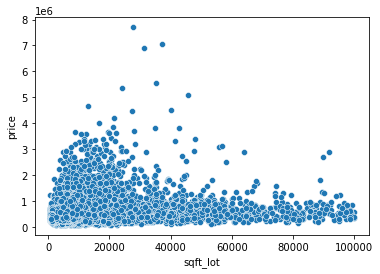

In [103]:
sns.scatterplot(x = df3['sqft_lot'] , y = df3['price'])

In [89]:
df3 = df2.copy()

In [116]:
sqftlot_s_form = 'price~sqft_lot'
sqftlot_s_model = sqftlot_s_model = ols(formula = sqftlot_s_form, data = df2).fit()

In [117]:
sqftlot_s_summary = sqftlot_s_model.summary()
sqftlot_s_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     177.2
Date:                Mon, 04 Oct 2021   Prob (F-statistic):           2.90e-40
Time:                        15:30:24   Log-Likelihood:            -3.0633e+05
No. Observations:               21534   AIC:                         6.127e+05
Df Residuals:                   21532   BIC:                         6.127e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    5.28e+05   2644.447    199.663      0.000    5.23e+05    5.33e+05
sqft_lot       0.7992      0.060     13.310      0.000       0.681       0.917
==============================================================================
Omnibus:                    18906.684   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1100648.811
Skew:                           3.980   Prob(JB):                         0.00
Kurtosis:                      37.108   Cond. No.                     4.69e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.69e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""